<a href="https://colab.research.google.com/github/byOKO/NASA-Bearing-Data-set_EDA/blob/main/3rd_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>EDA on NASA Bearing Dataset (3rd_test)</h1> 


In [ ]:
import os
os.chdir('/content')
print("Current Working Directory")
% pwd

Current Working Directory


'/content'

In [ ]:
#Imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#PyDrive 다운받고 import
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenthenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id는 <br>
1) google drive에서 공유 링크를 생성하고,<br>
2) 크롬 창에서 ctrl+shift+j를 눌러 아래 자바 스크립트 코드를 입력해 얻을 수 있다.<br>

```
var url = "your_shareable_link_to_file"
function getIdFromUrl(url) { return url.match(/[-\w]{25,}/); }
getIdFromUrl(url)
```
참고: [Importing files from Google Drive in Google Colab](https://buomsoo-kim.github.io/colab/2018/04/16/Importing-files-from-Google-Drive-in-Google-Colab.md/)



In [ ]:
#3rd_test.zip 다운받기
file_id = '1V_8Y7Z-SRYif9zqIUjW32WKQZnOV7_wz'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('4th_test.zip')
print('Downloaded Data File')

Downloaded Data File


In [ ]:
!unzip 4th_test.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: txt/2004.03.13.14.02.46  
  inflating: txt/2004.03.13.14.12.46  
  inflating: txt/2004.03.13.14.22.46  
  inflating: txt/2004.03.13.14.32.46  
  inflating: txt/2004.03.13.14.42.46  
  inflating: txt/2004.03.13.14.52.46  
  inflating: txt/2004.03.13.15.02.46  
  inflating: txt/2004.03.13.15.12.46  
  inflating: txt/2004.03.13.15.22.46  
  inflating: txt/2004.03.13.15.32.46  
  inflating: txt/2004.03.13.15.42.46  
  inflating: txt/2004.03.13.15.52.46  
  inflating: txt/2004.03.13.16.02.46  
  inflating: txt/2004.03.13.16.12.46  
  inflating: txt/2004.03.13.16.22.46  
  inflating: txt/2004.03.13.16.32.46  
  inflating: txt/2004.03.13.16.42.46  
  inflating: txt/2004.03.13.16.52.46  
  inflating: txt/2004.03.13.17.02.46  
  inflating: txt/2004.03.13.17.12.46  
  inflating: txt/2004.03.13.17.22.46  
  inflating: txt/2004.03.13.17.32.46  
  inflating: txt/2004.03.13.17.42.46  
  inflating: txt/2004.03.13.17.52.46  
  inflating: txt/2004.03.13.

In [ ]:
data_dir = 'txt'
merged_data = pd.DataFrame()

#2004년 3월 4일부터 4월 18일까지의 data
for filename in os.listdir(data_dir):
  dataset=pd.read_csv(os.path.join(data_dir, filename),  sep='\t')
  dataset_mean_abs = np.array(dataset.abs().mean())
  dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
  dataset_mean_abs.index=[filename]
  merged_data = merged_data.append(dataset_mean_abs)

#Column 이름 설정
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

#dataframe 을 datetime 형식으로 바꿈
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTeset_2.csv')

In [ ]:
merged_data

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-03-04 09:27:46,0.061630,0.075278,0.051991,0.043475
2004-03-04 09:32:46,0.060774,0.072206,0.052239,0.042039
2004-03-04 09:42:46,0.062195,0.072886,0.054809,0.041360
2004-03-04 09:52:46,0.062994,0.073433,0.054261,0.043126
2004-03-04 10:02:46,0.061945,0.073006,0.053237,0.042617
...,...,...,...,...
2004-04-18 02:02:55,0.122483,0.188266,0.342773,0.195169
2004-04-18 02:12:55,0.110250,0.166027,0.331777,0.205829
2004-04-18 02:22:55,0.115789,0.201599,0.404317,0.222174
2004-04-18 02:32:55,0.119909,0.199330,0.543770,0.229026


In [ ]:
print(f'Total Data Points {merged_data.shape[0]}')

Total Data Points 6324


[Text(0, 0.5, 'Vibration/Acceleration'), Text(0.5, 0, 'Year-Month-Data')]

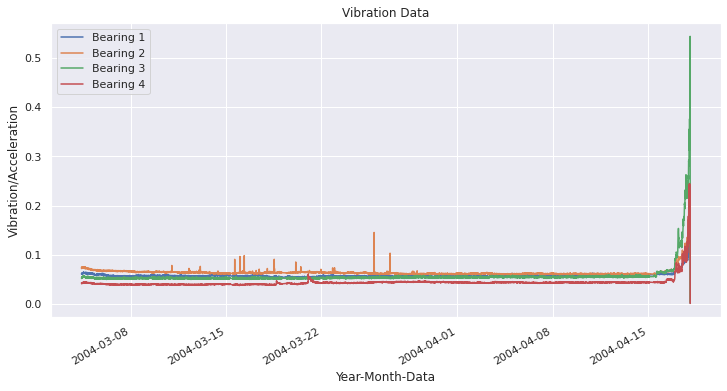

In [ ]:
#데이터 시각화
ax = merged_data.plot(figsize = (12, 6), title="Vibration Data", legend=True)
ax.set(xlabel="Year-Month-Data", ylabel = "Vibration/Acceleration")


Text(2004-04-15 14:52:55, 0.3, 'Vibration value increases')

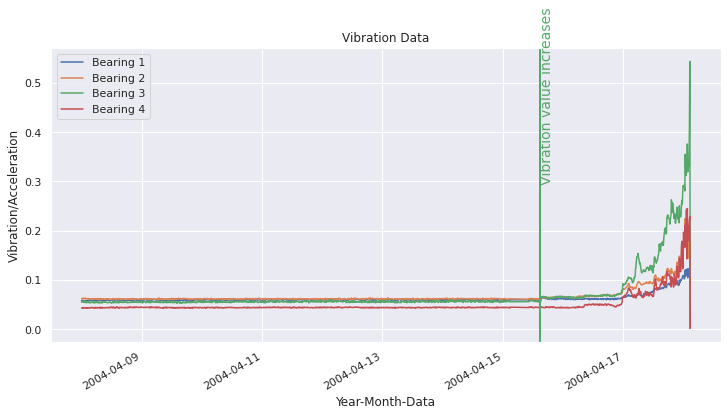

In [ ]:
#2004-04-08부터 2004-04-18까지의 범위를 살펴본다
later = merged_data['2004-04-08 00:01:57':]
ax1=later.plot(figsize = (12, 6), title="Vibration Data", legend=True)
ax1.set(xlabel="Year-Month-Data", ylabel = "Vibration/Acceleration")
plt.axvline(x='2004-04-15 14:52:55', linewidth=2, color='g', label ="Breakdown of Bearing 3")
plt.text('2004-04-15 14:52:55',0.3,'Vibration value increases',rotation=90, fontsize=14, color='g')